In [267]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.utils import shuffle



from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [268]:

rate_df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
rate_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [269]:
data_df = pd.read_csv('Unemployment in India.csv')
data_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [270]:
data_df.columns = data_df.columns.str.strip()
rate_df.columns = rate_df.columns.str.strip()
rate_df['Date'] = rate_df['Date'].str.strip()
data_df['Date'] = data_df['Date'].str.strip()
data_df = data_df.dropna(subset=['Region'])

In [271]:
rate_df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [272]:
data_df['area_encoded'] = pd.Categorical(data_df['Area']).codes


In [273]:
data_df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,area_encoded
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,0
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,0
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,0
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,0
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,0


In [274]:
date = np.array(date)
region = np.array(rate_df['Region'])
unemp_rate = np.array(rate_df['Estimated Unemployment Rate (%)'])

In [275]:
df_rate_by_region = pd.DataFrame({'Date': date, 'Region': region, 'UnEmpRate': unemp_rate})


In [276]:
df_rate_by_region

,Date,Region,UnEmpRate
0,2020-01-31,Andhra Pradesh,5.48
1,2020-02-29,Andhra Pradesh,5.83
2,2020-03-31,Andhra Pradesh,5.79
3,2020-04-30,Andhra Pradesh,20.51
4,2020-05-31,Andhra Pradesh,17.43
...,...,...,...
262,2020-06-30,West Bengal,7.29
263,2020-07-31,West Bengal,6.83
264,2020-08-31,West Bengal,14.87
265,2020-09-30,West Bengal,9.35


In [277]:

labour_particip = rate_df.groupby(['Region', 'Date', 'longitude', 'latitude'])['Estimated Labour Participation Rate (%)'].mean().reset_index()
labour_particip

,Region,Date,longitude,latitude,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,29-02-2020,15.9129,79.740,40.90
1,Andhra Pradesh,30-04-2020,15.9129,79.740,33.10
2,Andhra Pradesh,30-06-2020,15.9129,79.740,47.41
3,Andhra Pradesh,30-09-2020,15.9129,79.740,37.47
4,Andhra Pradesh,31-01-2020,15.9129,79.740,41.02
...,...,...,...,...,...
262,West Bengal,31-03-2020,22.9868,87.855,47.27
263,West Bengal,31-05-2020,22.9868,87.855,41.92
264,West Bengal,31-07-2020,22.9868,87.855,46.17
265,West Bengal,31-08-2020,22.9868,87.855,47.48


## Unemployment Rate before Corona

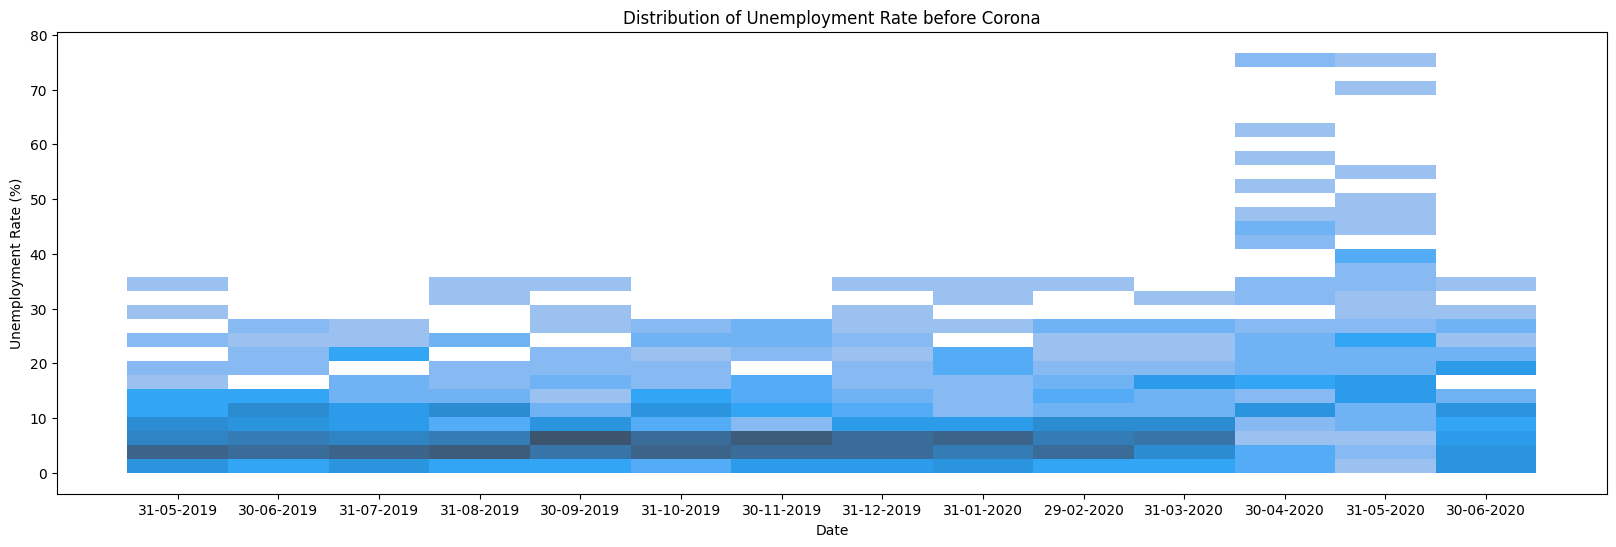

In [282]:

# Distribution of Unemployment Rate
plt.figure(figsize=(20, 6))
sns.histplot(data=data_df, x='Date', y='Estimated Unemployment Rate (%)', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Unemployment Rate before Corona')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

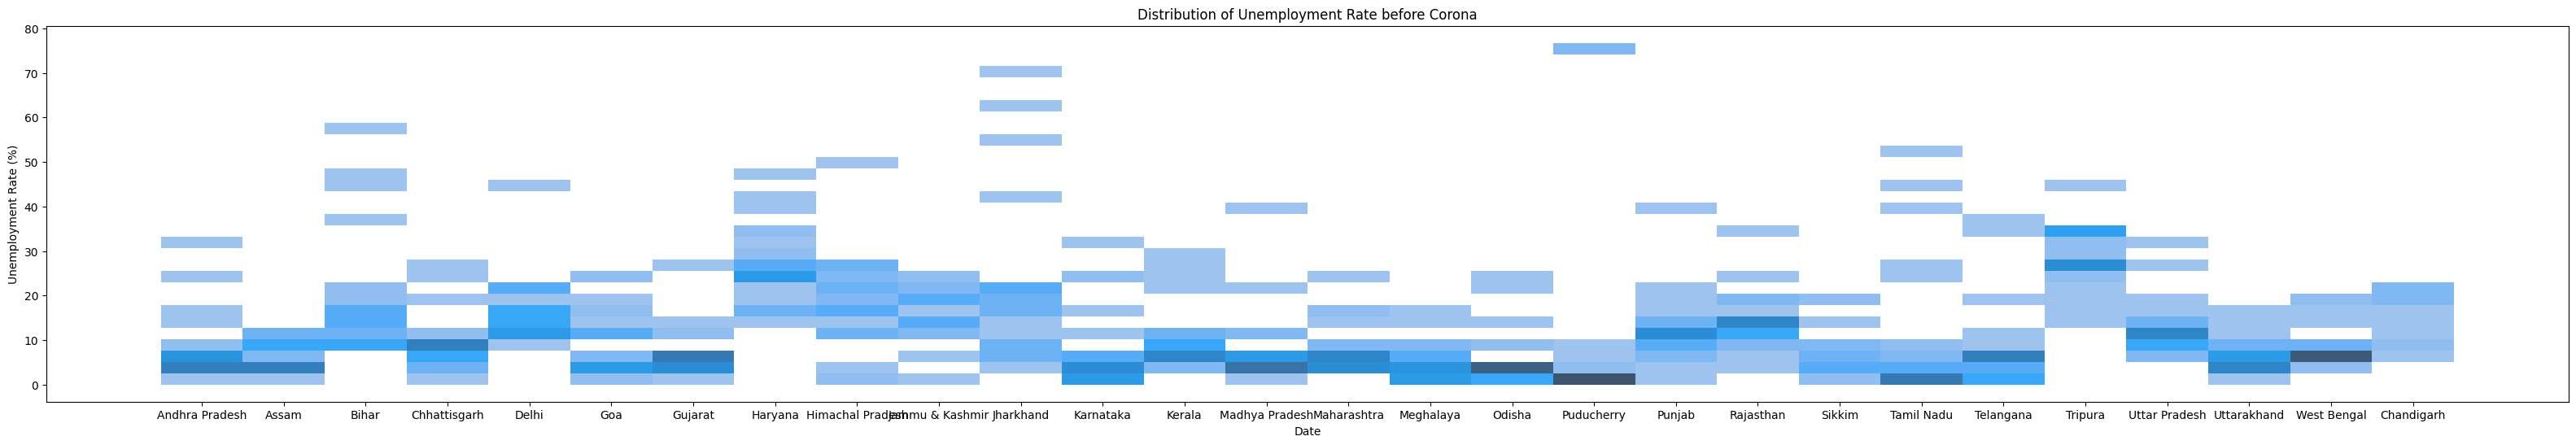

In [286]:
plt.figure(figsize=(40, 6))
sns.histplot(data=data_df, x='Region', y='Estimated Unemployment Rate (%)', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Unemployment Rate before Corona')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

## Unemployment Rate After Cornona

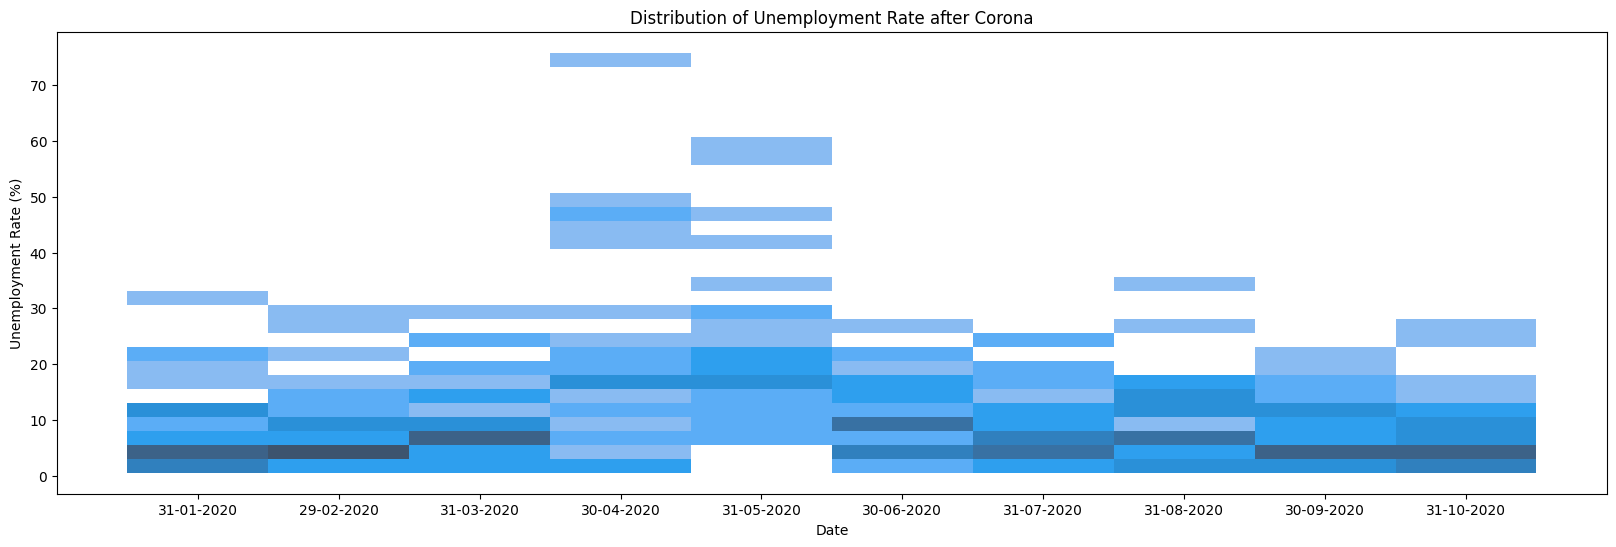

In [ ]:
# Distribution of Unemployment Rate
plt.figure(figsize=(20, 6))
sns.histplot(data=rate_df, x='Date', y='Estimated Unemployment Rate (%)', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Unemployment Rate after Corona')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

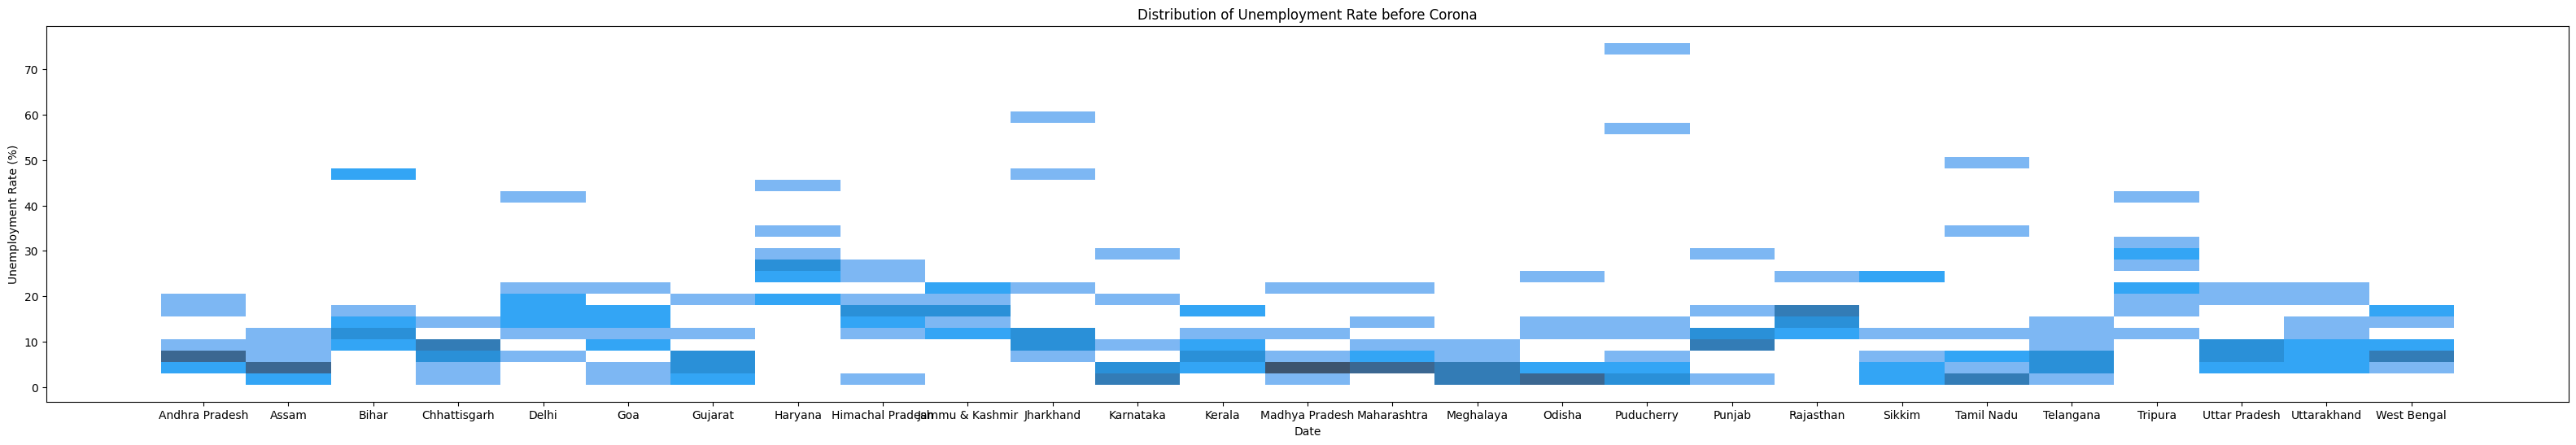

In [287]:
plt.figure(figsize=(40, 6))
sns.histplot(data=rate_df, x='Region', y='Estimated Unemployment Rate (%)', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Unemployment Rate before Corona')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()